## Examine historical weather data for NYC for citibke project.
- Historical weather data downloaded to sqlite databes w/ **get_weather_data.py**

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3
import numpy as np

In [2]:
con = sqlite3.connect("data/nyc_weather.db3")

In [3]:
df = pd.read_sql_query("SELECT * FROM temps",con)

In [4]:
df.head()

,date,st_code,max_temp,min_temp,mean_temp,year,yday,month,precip_In,cloud_cover,max_gust_mph,events
0,2013-01-01 00:00:00,KLGA,41,27,34,2013,1,1,T,7,35.0,Rain
1,2013-01-02 00:00:00,KLGA,34,23,29,2013,2,1,0.00,7,28.0,None
2,2013-01-03 00:00:00,KLGA,34,25,30,2013,3,1,0.00,5,26.0,None
3,2013-01-04 00:00:00,KLGA,39,33,36,2013,4,1,0.00,3,31.0,None
4,2013-01-05 00:00:00,KLGA,43,34,39,2013,5,1,0.00,3,33.0,None


In [5]:
df['date'] = pd.to_datetime(df.date)
df.loc[df.precip_In=='T'] = 0
df.loc[:,'precip_In'] = df.astype({'precip_In':'float64'})
df = df.loc[df.date> '2013-01-01 00:00:00']
#df.set_index('date',inplace=True,drop=False)
df.head()

,date,st_code,max_temp,min_temp,mean_temp,year,yday,month,precip_In,cloud_cover,max_gust_mph,events
1,2013-01-02,KLGA,34,23,29,2013,2,1,0.0,7,28.0,None
2,2013-01-03,KLGA,34,25,30,2013,3,1,0.0,5,26.0,None
3,2013-01-04,KLGA,39,33,36,2013,4,1,0.0,3,31.0,None
4,2013-01-05,KLGA,43,34,39,2013,5,1,0.0,3,33.0,None
6,2013-01-07,KLGA,45,38,42,2013,7,1,0.0,1,23.0,None


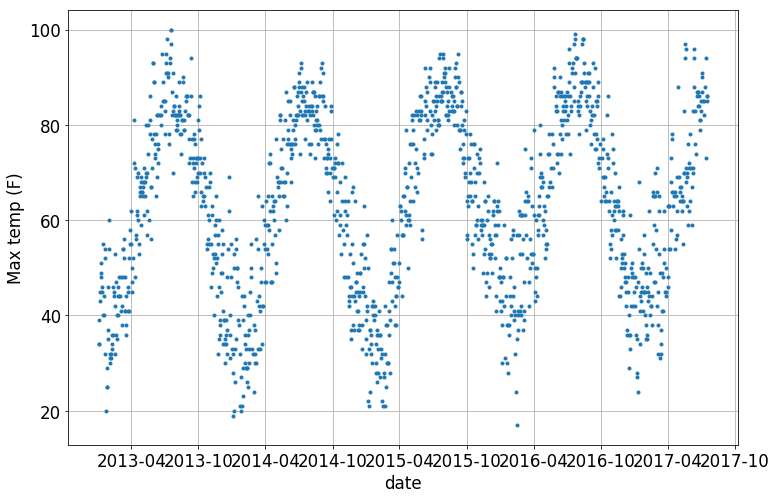

In [6]:
plt.figure(figsize=(12,8))
plt.plot(df.date, df.max_temp, '.')
plt.grid()
plt.xlabel('date')
plt.ylabel('Max temp (F)')
plt.savefig('figures/temp_vs_date.pdf')

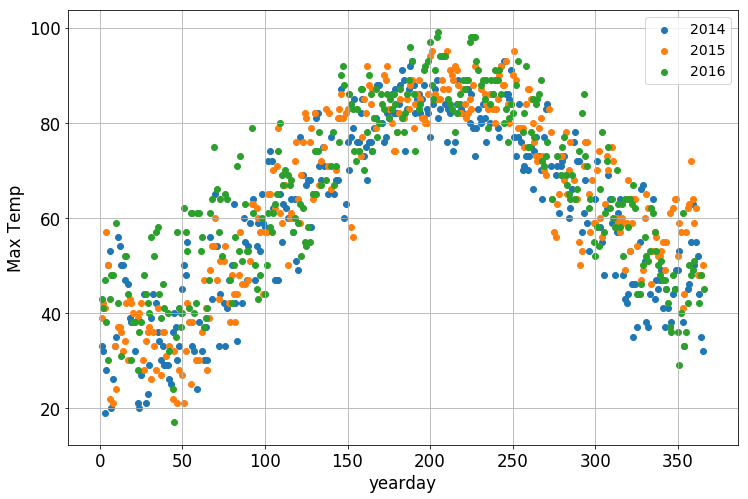

In [7]:
plt.figure(figsize=(12,8))
for year in [2014,2015,2016]:    
    plt.scatter( df.loc[df.year==year].yday, df.loc[df.year==year].max_temp,label=str(year))
plt.grid()
plt.xlabel('yearday')
plt.ylabel('Max Temp')
plt.legend();

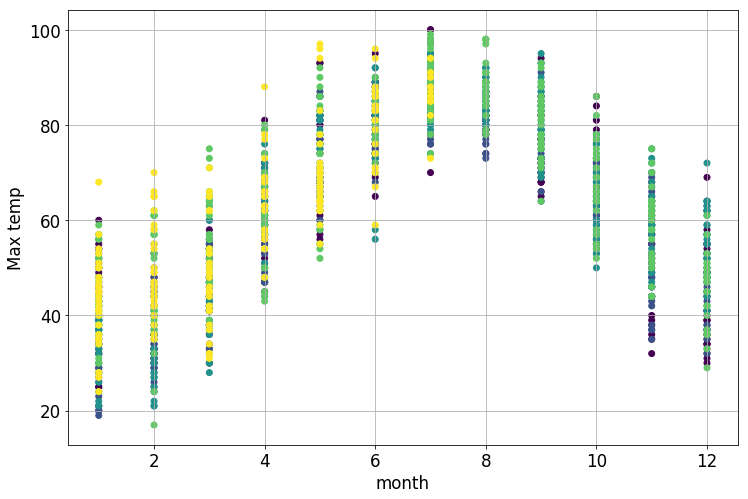

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(df.month,df.max_temp,c=df.year)
plt.grid()
plt.xlabel('month')
plt.ylabel('Max temp')

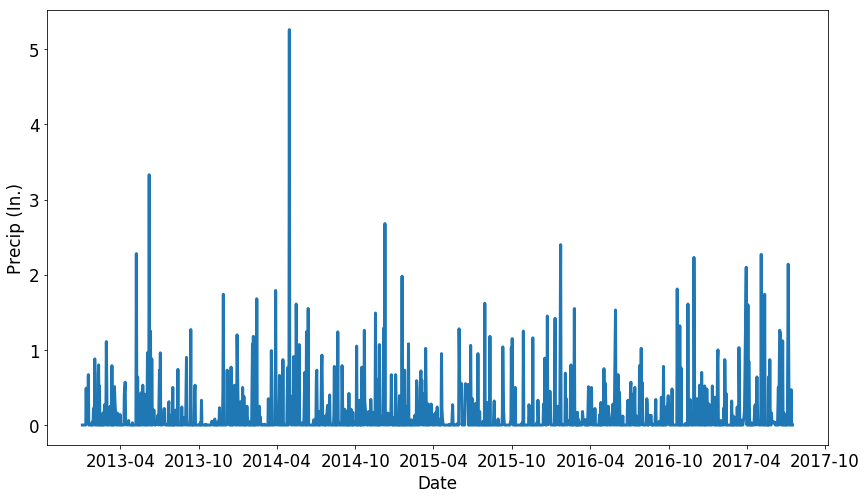

In [9]:
plt.figure(figsize=(14,8))
plt.plot(df.date, df.precip_In)
plt.xlabel('Date')
plt.ylabel('Precip (In.)')
plt.savefig('figures/precip_vs_date.pdf')

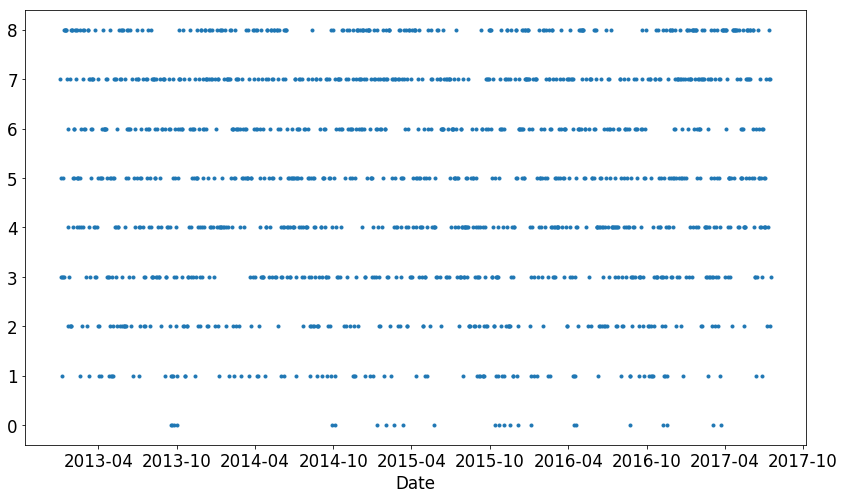

In [10]:
#df2 = df.copy()
#df2 = df2[df2.year==2014]
plt.figure(figsize=(14,8))
plt.plot(df.date, df.cloud_cover,'.')
plt.xlabel('Date')
plt.savefig('figures/cloud_vs_date.pdf')

(array([  24.,   87.,  124.,  173.,    0.,  197.,  190.,  187.,  234.,  204.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

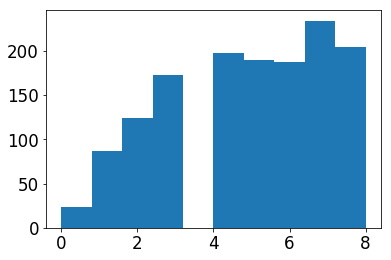

In [11]:
plt.hist(df.cloud_cover)

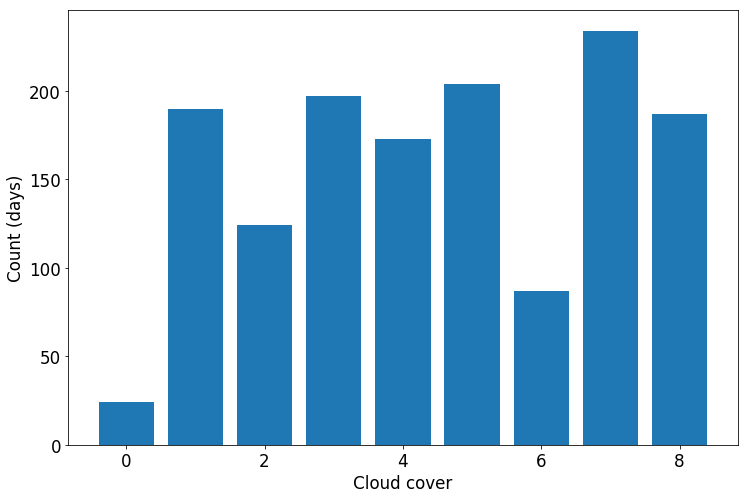

In [12]:
plt.figure(figsize=(12,8))
plt.bar(df.cloud_cover.unique(),df.cloud_cover.value_counts())
plt.xlabel('Cloud cover')
plt.ylabel('Count (days)');

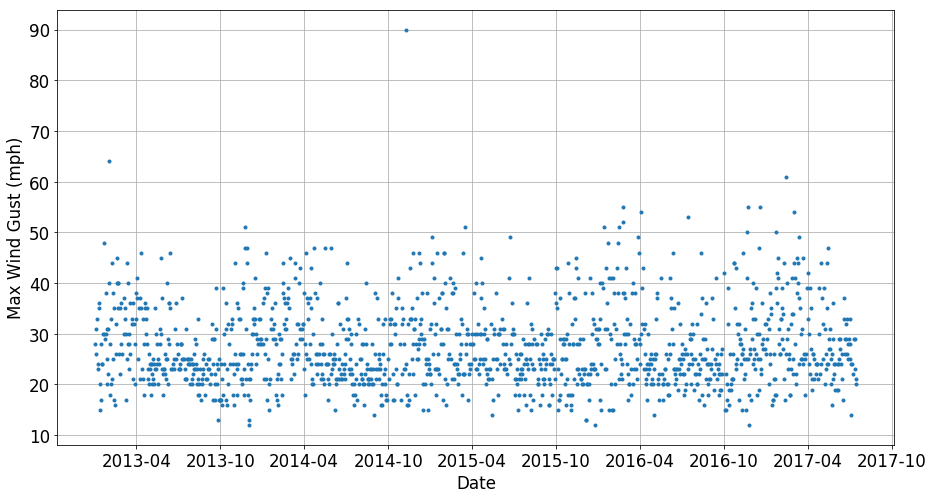

In [13]:
plt.figure(figsize=(15,8))
plt.plot(df.date, df.max_gust_mph,'.')
plt.xlabel('Date')
plt.ylabel('Max Wind Gust (mph)');
plt.grid()
plt.savefig('figures/wind_vs_date.pdf')

In [14]:
con.close()